# Noise Interferometry Demo

First, let's import all of the dependancies

In [1]:
import multiprocessing as mp
import numpy as np
import sys
import os
import numpy as np
import scipy
import datetime
from matplotlib import pyplot as plt

#Adding OOIPY Home Directory to Path
cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ooipy_dir)
from ooipy.hydrophone import Noise_Interferometry as NI

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Using the Non-Looping Functionality
Since Noise Interferometry is usually calculated over long periods, the ability to loop through different average periods is available. First let's walk through how to do a single period calculation. This returns the NCF object.

This sets up all of the input parameters and initializes an instance of the NCF object

In [2]:
avg_time = 1 #minutes
start_time = datetime.datetime(2017,3,10,0,0,0) # time of first sample
node1 = '/LJ01C'
node2 = '/PC01A'
filter_cutoffs = np.array([20, 30])
W = 30

NCF_object = NI.NCF(avg_time, start_time, node1, node2, filter_cutoffs, W, verbose=True, whiten=False)

In [5]:
NCF_object = NI.get_audio(NCF_object)


Getting Audio from Node 1...
   Getting Audio from Node 2...


In [13]:
NCF_object.whiten=False
NCF_object = NI.preprocess_audio(NCF_object)
NCF_object = NI.calc_xcorr(NCF_object)

Filtering and Whitening Data for Node 1...
   Filtering and Whitening Data for Node 2...
   Correlating Data...


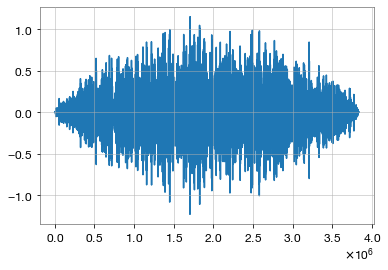

In [14]:
plt.plot(NCF_object.NCF)

## Using Loop Functionality
This saves the NCF for each average periods in the directory ./ckpts/
This example is just doing 2 loops

In [8]:
num_periods = 2
NI.calculate_NCF_loop(num_periods, node1, node2, avg_time, start_time, W,  filter_cutoffs, verbose=True)

Calculting NCF for Period 1:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering and Whitening Data for Node 1...
   Filtering and Whitening Data for Node 2...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 49.858784675598145 


Calculting NCF for Period 2:
   Getting Audio from Node 1...
   Getting Audio from Node 2...
   Filtering and Whitening Data for Node 1...
   Filtering and Whitening Data for Node 2...
   Correlating Data...
   Time to Calculate NCF for 1 Average Period: 53.801218032836914 




## Creating Single NCF from saved Chekpoints

In [11]:
num_periods = 2

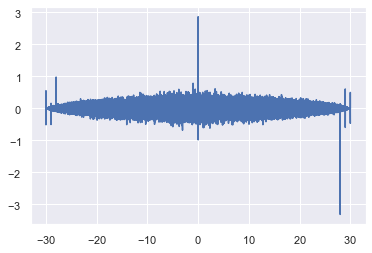

In [17]:
for k in range(num_periods):
    ckpt_name = './ckpts/ckpt_'+str(k)+'.pkl'
    with open(ckpt_name, 'rb') as f:
        xcorr_1hr = pickle.load(f)

    if k == 0:
        xcorr = xcorr_1hr
    else:
        xcorr = xcorr + xcorr_1hr

sns.set()
#Plot Xcorr
dt = 1/64000
t = np.arange(-xcorr.shape[0]*dt/2,xcorr.shape[0]*dt/2,dt)

plt.plot(t,xcorr)